# **ADD HERE THE NOTEBOOK NAME**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook

## Additional Comments


* In case you have any additional comments that don't fit in the previous bullets, please state them here.


---

# Install python packages in the notebooks

<span style="color:red;">IMPORTANT!!! Change "ml-template-forked" to the name that you have given your GitHub/GitPod Workspace.</span>

In [19]:
%pip install -r /workspace/manned-unmanned-airplane-classifer/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 66.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 127.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 134.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 144.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory.  

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [20]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/manned-unmanned-airplane-classifer'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [21]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [22]:
current_dir = os.getcwd()
current_dir

'/workspace'

---

In [23]:
import joblib
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

---

## Table of Content

- [Section 1](#section-1)
- [Section 2](#section-2)
- [Save files to workspace](#save-files-to-workspace)


---

# Section 1


Section 1 content

1 hidden layer with 3 neurons (simple and appropriate for this toy dataset).

ReLU activation in hidden layer (default for MLPClassifier).

Sigmoid output is approximated using the logistic solver and binary cross-entropy under the hood.

In [24]:
# Step 2: Define the dataset
data = {
    'Wingspan': [
        0.35, 0.34, 0.42, 0.4, 0.7, 12, 20, 39.9, 19, 15,  # Drones
        11, 10.7, 17.6, 35.8, 9.45, 68, 11.6, 11.7, 30.4, 14.8  # Manned
    ],
    'MaxSpeed': [
        60, 55, 70, 58, 94, 220, 480, 630, 1100, 350,  # Drones
        226, 230, 540, 850, 2400, 988, 285, 338, 956, 375  # Manned
    ],
    'Weight': [
        1.2, 0.3, 1.1, 0.9, 3.4, 650, 2220, 14600, 20400, 5000,  # Drones
        1111, 1157, 5670, 41413, 12000, 183500, 1150, 1542, 45000, 4900  # Manned
    ],
    'Label': [0]*10 + [1]*10  # 0 = Drone, 1 = Manned
}


df = pd.DataFrame(data)
X = df[['Wingspan', 'MaxSpeed', 'Weight']]
y = df['Label']


In [25]:
# Step 3: Preprocess (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [27]:
# Step 5: Train models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'Neural Net': MLPClassifier(hidden_layer_sizes=(3,), activation='relu', max_iter=1000)
}

In [28]:
# Step 6: Fit and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

KNN Accuracy: 0.67
Random Forest Accuracy: 0.50
SVM Accuracy: 0.67
Neural Net Accuracy: 0.67


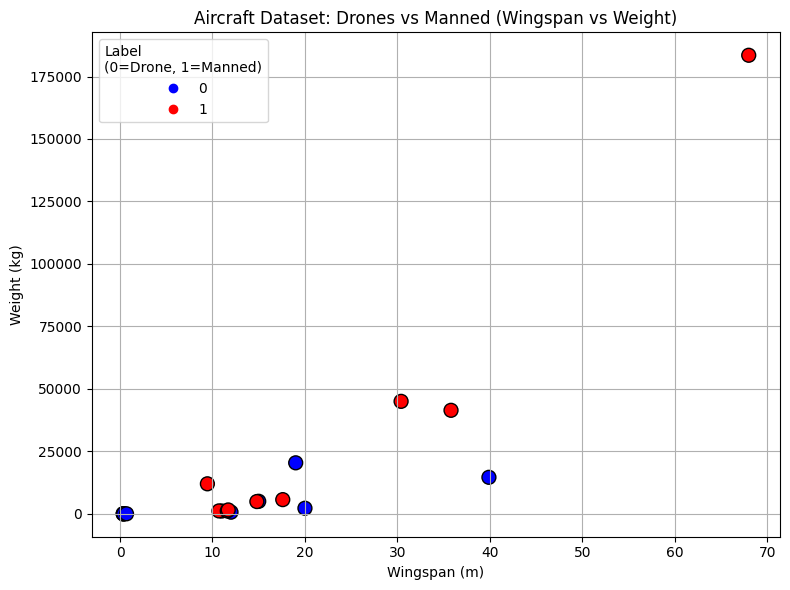

In [29]:
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Wingspan'], df['Weight'], c=df['Label'], cmap='bwr', edgecolor='k', s=100)
plt.xlabel("Wingspan (m)")
plt.ylabel("Weight (kg)")
plt.title("Aircraft Dataset: Drones vs Manned (Wingspan vs Weight)")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Label\n(0=Drone, 1=Manned)")
plt.tight_layout()
plt.show()

---

# Section 2


Section 2 content

---

# Save files to workspace

We will generate the following files
* Train set
* Test set
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* etc.

In [ ]:
topic = 'topic'  # datasets
notebook = 'notebook'  # collections
version = 'v1'
file_path = f'outputs/{notebook}/{notebook}/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/TelcoCustomerChurn.csv",index=False)

## Train Set

Note that ...

In [ ]:
print(X_train.shape)
X_train.head()

X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [ ]:
y_train

In [ ]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)